# Cumulative Wake 

This notebook reproduces the results of the paper describing the cumulative wake model:

Majid Bastankhah, Bridget L. Welch, Luis A. Martínez-Tossas, Jennifer King and Paul Fleming:
*Analytical solution for the cumulative wake of wind turbines in wind farms*, 
J. Fluid Mech. (2021), vol. 911, A53, [doi:10.1017/jfm.2020.1037](https://doi.org/10.1017/jfm.2020.1037)



In [ ]:
# Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

### Loading objects

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from py_wake.site._site import UniformSite
from py_wake.site.shear import LogShear
from py_wake.utils.plotting import setup_plot

### Load wind farm model 

The wind farm and turbine models were setup to mimick as much as possible the setup described in the paper. Have a look at the definiton of the models, how this is done.   

In [2]:
from py_wake.literature.cumulative_sum import nrel5mw

### Turbine 

[<Axes: title={'center': 'nrel5mw'}, xlabel='Wind speed [m/s]', ylabel='Power [W]'>,
 <Axes: ylabel='Thrust coefficient'>]

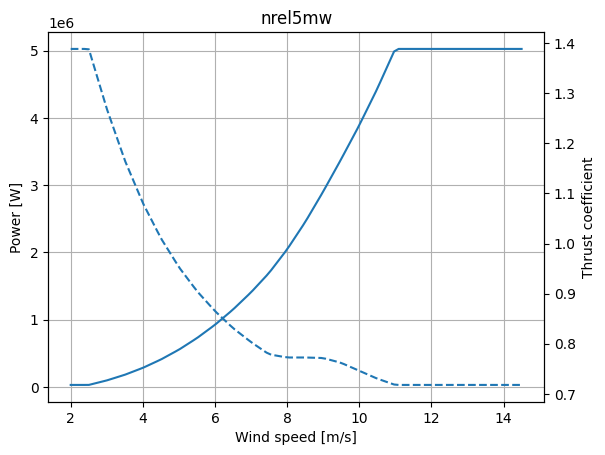

In [3]:
wt = nrel5mw()
wt.plot_power_ct(ws=np.linspace(2, 14.5, 100))

### Layout 

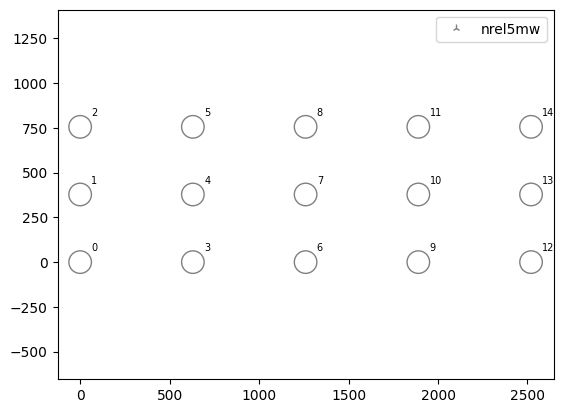

In [7]:
y, x = [v.flatten() for v in np.meshgrid(np.arange(3) * wt.diameter() * 3, np.arange(5) * wt.diameter() * 5)]
wt.plot_xy(x, y)

### Site

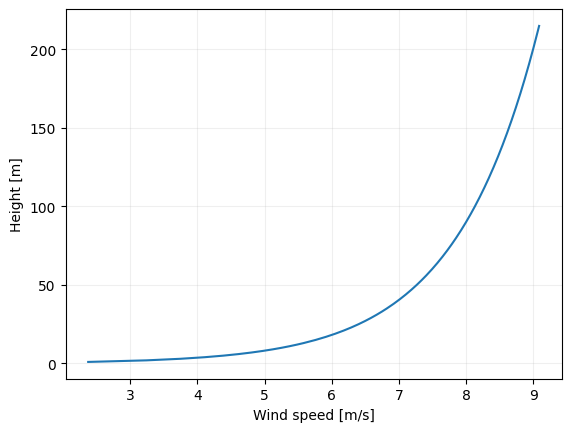

In [10]:
# wind speed at hub height
u_h = 8.
# turbulence intensity at hub height
ti_h = 0.1

site = UniformSite(shear=LogShear(h_ref=wt.hub_height(), z0=.15))

z = np.arange(1, wt.diameter() + wt.hub_height())
u = [site.local_wind(x=[0], y=[0], h=[z_], wd=0, ws=u_h).WS_ilk[0][0] for z_ in z]
plt.plot(u, z)
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Height [m]')
plt.grid(alpha=0.2)

### Wind farm simulation: Aligned 

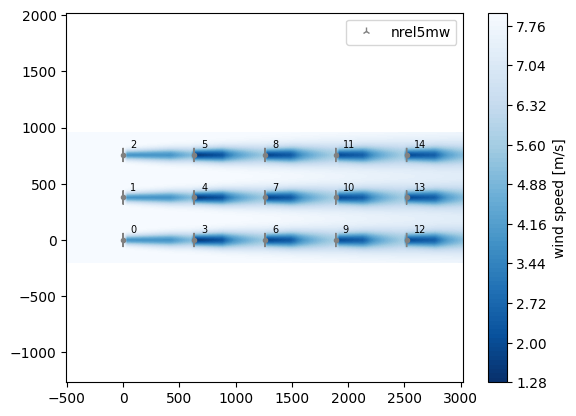

In [31]:
from py_wake.flow_map import XYGrid
from py_wake.literature import CumulativeWake

wfm = CumulativeWake(site, wt)
sim_res = wfm(x, y, ws=u_h, wd=270., TI=ti_h)
sim_res.flow_map(XYGrid(resolution=100)).plot_wake_map()

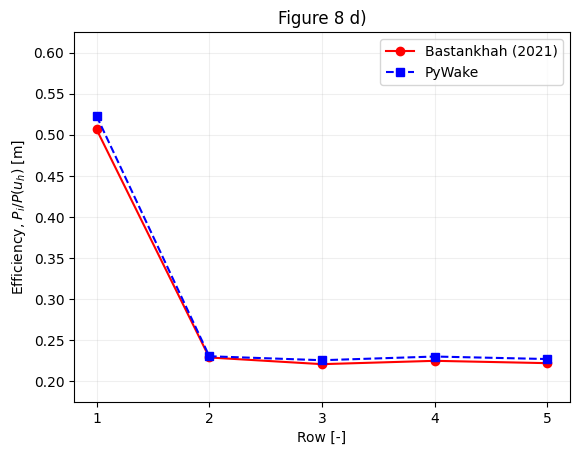

In [32]:
# middle row only
i_wt = [1, 4, 7, 10, 13]
# extracted from paper
ref = [0.5065040650406504, 0.22886178861788614, 0.2207317073170732, 0.22479674796747962, 0.2219512195121951]
plt.plot(np.arange(1, 6, 1), ref, 'ro-', label='Bastankhah (2021)')
# power from PyWake
plt.plot(np.arange(1, 6, 1), np.squeeze(sim_res.Power.isel(wt=i_wt)) / (0.5 * 1.225 * u_h**3 * (wt.diameter()**2 * np.pi / 4.)), 'bs--', label='PyWake')
plt.xlabel('Row [-]')
plt.ylabel('Efficiency, $P_i/P(u_h)$ [m]')
plt.grid(alpha=0.2)
plt.title('Figure 8 d)')
plt.xticks(np.arange(1, 6, 1))
plt.ylim([0.175, 0.625])
plt.legend()


Differences are related to the rotor-averaging of the wind speed, which then also influences the power and thrust. 

### Wind farm simulation: Slanted

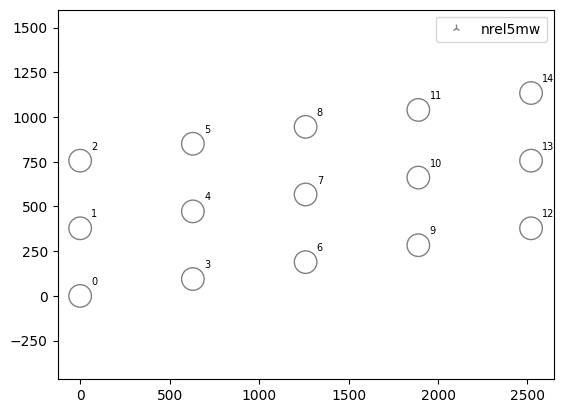

In [25]:
y_off = y.copy()
for i in range(5):
    y_off[3 * i: 3 * (i + 1)] += 0.75 * i * wt.diameter()

wt.plot(x, y_off) 

In [33]:
sim_res = wfm(x, y_off, ws=u_h, wd=270., TI=ti_h)
sim_res.flow_map(XYGrid(resolution=100)).plot_wake_map()

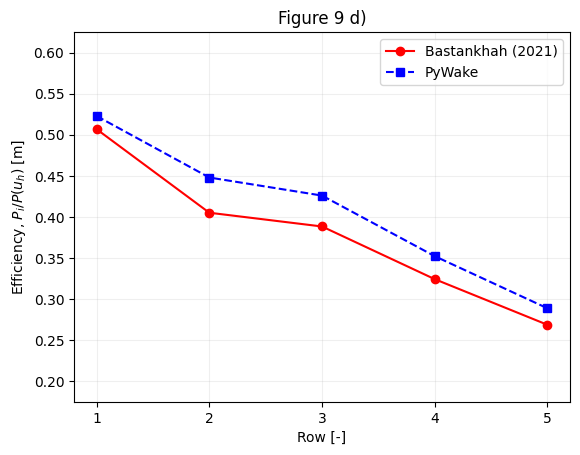

In [34]:
# middle row only
i_wt = [1, 4, 7, 10, 13]
# extracted from paper
ref = [0.5068437180796731, 0.40510725229826355, 0.38835546475995913, 0.32420837589376916, 0.2686414708886619]
plt.plot(np.arange(1, 6, 1), ref, 'ro-', label='Bastankhah (2021)')
# power from PyWake
plt.plot(np.arange(1, 6, 1), np.squeeze(sim_res.Power.isel(wt=i_wt)) / (0.5 * 1.225 * u_h**3 * (wt.diameter()**2 * np.pi / 4.)), 'bs--', label='PyWake')
plt.xlabel('Row [-]')
plt.ylabel('Efficiency, $P_i/P(u_h)$ [m]')
plt.grid(alpha=0.2)
plt.title('Figure 9 d)')
plt.xticks(np.arange(1, 6, 1))
plt.ylim([0.175, 0.625])
plt.legend()